In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
# Loading the dataset
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# One hot encoding to handle categorical data
dataset = pd.get_dummies(dataset,dtype=int,drop_first=True)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [4]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [5]:
# feature variable selection
independent = dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
independent.tail()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
45,1000.23,124153.04,1903.93,0,1
46,1315.46,115816.21,297114.46,1,0
47,0.00,135426.92,0.00,0,0
48,542.05,51743.15,0.00,0,1
49,0.00,116983.80,45173.06,0,0


In [6]:
# Outpur variable
dependent = dataset[['Profit']]
dependent.tail()

,Profit
45,64926.08
46,49490.75
47,42559.73
48,35673.41
49,14681.40


In [7]:
# Splitting data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(independent,dependent,test_size = 0.3,random_state = 0)

In [8]:
X_train.shape

(35, 5)

In [9]:
X_test.shape

(15, 5)

In [10]:
Y_train.shape

(35, 1)

In [11]:
Y_test.shape

(15, 1)

In [16]:
# Model crearion 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='absolute_error',splitter='best')
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='absolute_error')

<function matplotlib.pyplot.show(close=None, block=None)>

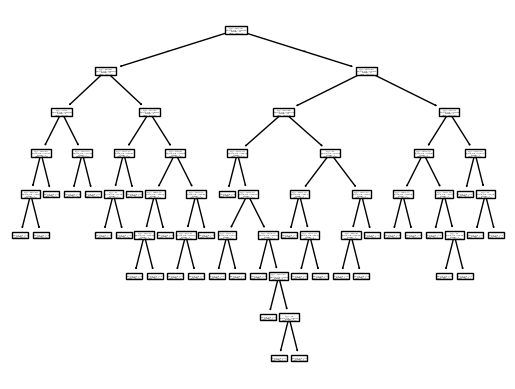

In [17]:
# Plotting the decsion tree structure
from sklearn import tree
tree.plot_tree(regressor)
plt.show

In [18]:
Y_pred = regressor.predict(X_test)
Y_pred

array([101004.64, 141585.52, 141585.52,  78239.91, 182901.99, 111313.02,
        69758.98,  99937.59, 108733.99, 156991.12,  89949.14,  89949.14,
       107404.34,  89949.14, 134307.35])

In [19]:
# Evaluation metrics
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
score

0.9583745025460839

In [21]:
# Saving the model
import pickle
filename = "Decision_Tree_Saved_Model.sav"
pickle.dump(regressor,open(filename,'wb'))

In [22]:
rd_input=float(input("R&D:"))
admin_input=float(input("Admin"))
mark_input=float(input("Marketing "))
fol_input=int(input("State_flo 0 or 1:"))
new_input=int(input("State_new 0 or 1:"))

In [23]:
result = regressor.predict([[rd_input,admin_input,mark_input,fol_input,new_input]])
result

C:\Users\thiru\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([81005.76])